In [1]:
#Plotting all the real and im from pol var code

In [1]:
#Loading in all the txt files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

obs_names=['01002901','01250101','03002201']#,'03003101','03010001','03010101']

#assigning variables to each dataset



In [2]:
import numpy as np


# Dictionary to store data for each observation
data_dict = {}

for obs in obs_names:
    filename = f"{obs}_L3_51to200P_20bins_90mod_qpo_search.txt"
    try:
        # Load text file (assuming whitespace-delimited, no header)
        data = np.loadtxt(filename)
        
        # Assign each column to variables
        # You can rename these depending on what the columns mean
        av_mod = data[:, 0]
        G_real = data[:, 1]
        G_imag = data[:, 2]
        G_null_real = data[:, 3]
        G_null_imag = data[:, 4]
        G_null_cpf_real = data[:, 5]
        G_null_cpf_imag = data[:, 6]
        dG= data[:, 7]
        fit_model_real = data[:, 8]
        fit_model_imag = data[:, 9]
        # ... extend if more columns

        # Store in dictionary for later use
        data_dict[obs] = {
            "av_mod": av_mod,
            "G_real": G_real,
            "G_imag": G_imag,
            "G_null_real": G_null_real,
            "G_null_imag": G_null_imag,
            "G_null_cpf_real": G_null_cpf_real,
            "G_null_cpf_imag": G_null_cpf_imag,
            "dG": dG,
            "fit_model_real": fit_model_real,
            "fit_model_imag": fit_model_imag
        }

        print(f"Loaded {filename} with shape {data.shape}")

    except FileNotFoundError:
        print(f"File {filename} not found.")


Loaded 01002901_L3_51to200P_20bins_90mod_qpo_search.txt with shape (20, 10)
File 01250101_L3_51to200P_20bins_90mod_qpo_search.txt not found.
Loaded 03002201_L3_51to200P_20bins_90mod_qpo_search.txt with shape (20, 10)


In [3]:
import numpy as np
import glob
import os

# Example list of observation names

# Dictionary to store data for each observation
data_dict = {}

for obs in obs_names:
    # Use glob to allow any L* match
    pattern = f"{obs}_L*_51to200P_20bins_90mod_qpo_search.txt"
    files = glob.glob(pattern)

    if not files:
        print(f"No files found for {obs}")
        continue

    data_dict[obs] = {}  # each obs gets its own sub-dict

    for filename in files:
        try:
            # Load text file (whitespace-delimited, no header assumed)
            data = np.loadtxt(filename)

            # Extract the 'L*' part from the filename
            L_part = [part for part in os.path.basename(filename).split("_") if part.startswith("L")][0]

            # Assign each column
            av_mod          = data[:, 0]
            G_real          = data[:, 1]
            G_imag          = data[:, 2]
            G_null_real     = data[:, 3]
            G_null_imag     = data[:, 4]
            G_null_cpf_real = data[:, 5]
            G_null_cpf_imag = data[:, 6]
            dG              = data[:, 7]
            fit_model_real  = data[:, 8]
            fit_model_imag  = data[:, 9]

            # Store in dictionary under obs -> Lx
            data_dict[obs][L_part] = {
                "av_mod": av_mod,
                "G_real": G_real,
                "G_imag": G_imag,
                "G_null_real": G_null_real,
                "G_null_imag": G_null_imag,
                "G_null_cpf_real": G_null_cpf_real,
                "G_null_cpf_imag": G_null_cpf_imag,
                "dG": dG,
                "fit_model_real": fit_model_real,
                "fit_model_imag": fit_model_imag
            }

            print(f"Loaded {obs} {L_part} with shape {data.shape}")

        except Exception as e:
            print(f"Error reading {filename}: {e}")


Loaded 01002901 L3 with shape (20, 10)
Loaded 01002901 L2 with shape (20, 10)
Loaded 01250101 L1 with shape (20, 10)
Loaded 01250101 L2 with shape (20, 10)
Loaded 03002201 L2 with shape (20, 10)
Loaded 03002201 L3 with shape (20, 10)
Loaded 03003101 L1 with shape (20, 10)
Loaded 03003101 L2 with shape (20, 10)
Loaded 03010001 L1 with shape (20, 10)
Loaded 03010001 L2 with shape (20, 10)
Loaded 03010101 L2 with shape (20, 10)
Loaded 03010101 L1 with shape (20, 10)


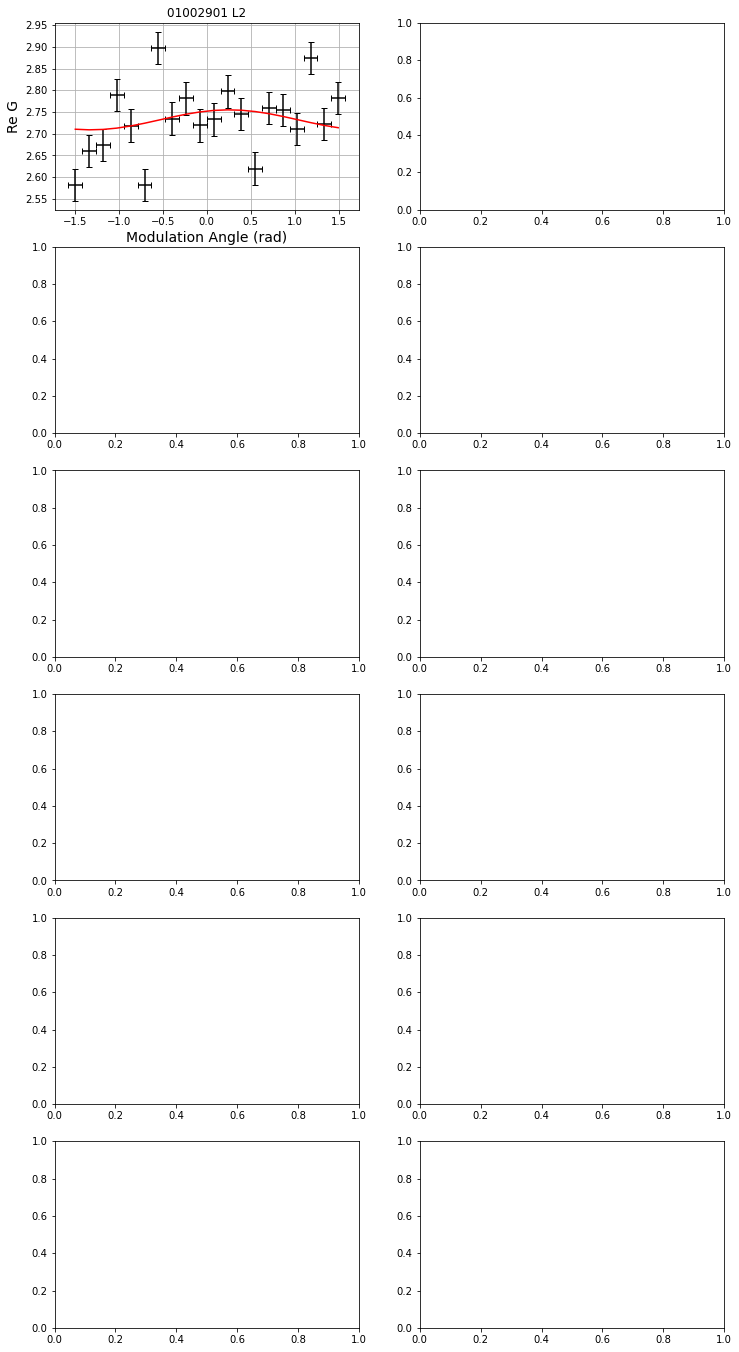

In [4]:
#SUbplot
xerr=(data_dict['01002901']['L2']['av_mod'][1]-data_dict['01002901']['L2']['av_mod'][0])/2
fig, axs = plt.subplots(len(obs_names), 2, figsize=(12, 4 * len(obs_names)))

axs[0, 0].errorbar(data_dict['01002901']['L2']['av_mod'], data_dict['01002901']['L2']['G_real'], xerr=xerr,yerr=data_dict['01002901']['L2']['dG'],ls='None', color='black', capsize=3)
axs[0, 0].plot(data_dict['01002901']['L2']['av_mod'], data_dict['01002901']['L2']['fit_model_real'], 'r-')
axs[0, 0].set_title('01002901 L2')
axs[0, 0].set_xlabel('Modulation Angle (rad)', fontsize=14)
axs[0, 0].set_ylabel('Re G', fontsize=14)
axs[0, 0].grid()


KeyboardInterrupt: 

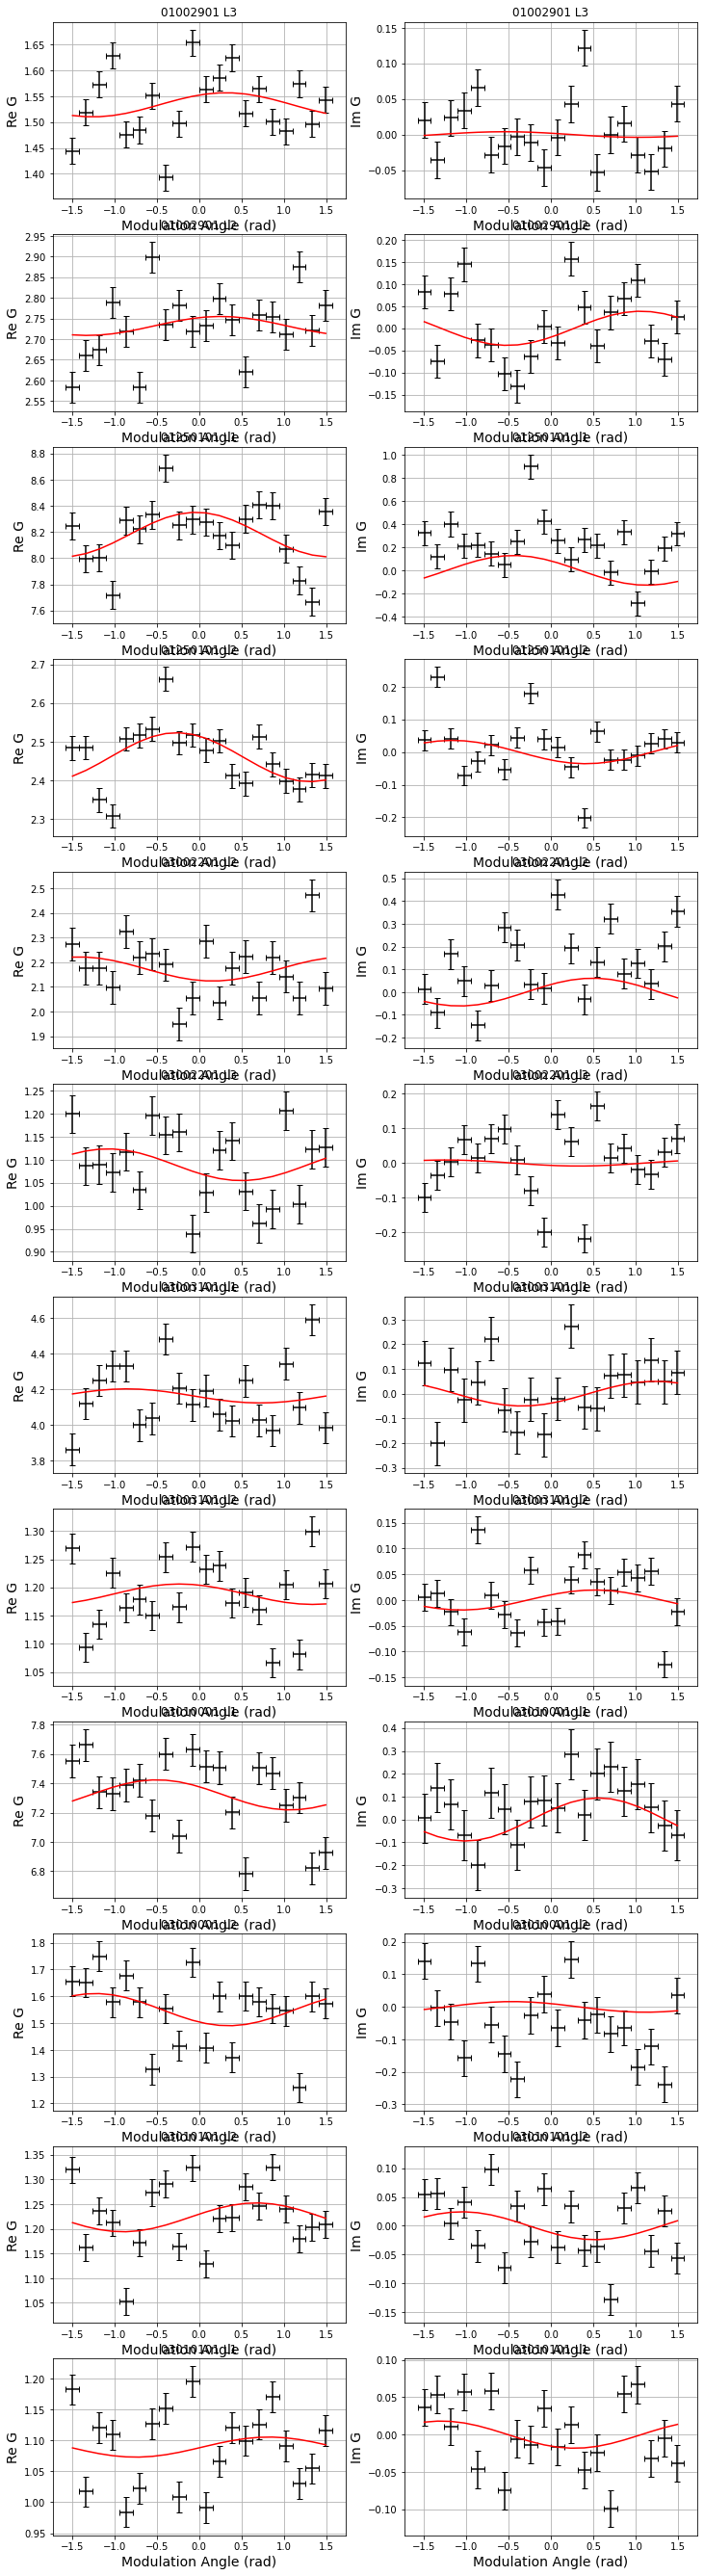

In [5]:
import matplotlib.pyplot as plt

xerr=(data_dict['01002901']['L2']['av_mod'][1]-data_dict['01002901']['L2']['av_mod'][0])/2

# Count total number of subplots
total_plots = sum(len(data_dict[obs]) for obs in obs_names)

fig, axs = plt.subplots(total_plots, 2, figsize=(12, 4 * total_plots))

# Flatten axs in case total_plots = 1
if total_plots == 1:
    axs = axs.reshape(1, 2)

plot_idx = 0
for obs in obs_names:
    for L_key in data_dict[obs]:
        row = plot_idx

        # Left panel: Real part
        axs[row, 0].errorbar(
            data_dict[obs][L_key]['av_mod'],
            data_dict[obs][L_key]['G_real'],
            xerr=xerr,
            yerr=data_dict[obs][L_key]['dG'],
            ls='None',
            color='black',
            capsize=3
        )
        axs[row, 0].plot(
            data_dict[obs][L_key]['av_mod'],
            data_dict[obs][L_key]['fit_model_real'],
            'r-'
        )
        axs[row, 0].set_title(f'{obs} {L_key}')
        axs[row, 0].set_xlabel('Modulation Angle (rad)', fontsize=14)
        axs[row, 0].set_ylabel('Re G', fontsize=14)
        axs[row, 0].grid()

        # Right panel: Imag part
        axs[row, 1].errorbar(
            data_dict[obs][L_key]['av_mod'],
            data_dict[obs][L_key]['G_imag'],
            xerr=xerr,
            yerr=data_dict[obs][L_key]['dG'],
            ls='None',
            color='black',
            capsize=3
        )
        axs[row, 1].plot(
            data_dict[obs][L_key]['av_mod'],
            data_dict[obs][L_key]['fit_model_imag'],
            'r-'
        )
        axs[row, 1].set_title(f'{obs} {L_key}')
        axs[row, 1].set_xlabel('Modulation Angle (rad)', fontsize=14)
        axs[row, 1].set_ylabel('Im G', fontsize=14)
        axs[row, 1].grid()

        plot_idx += 1

plt.tight_layout()
plt.savefig('all_obs_qpo_search.png', dpi=300)
plt.show()


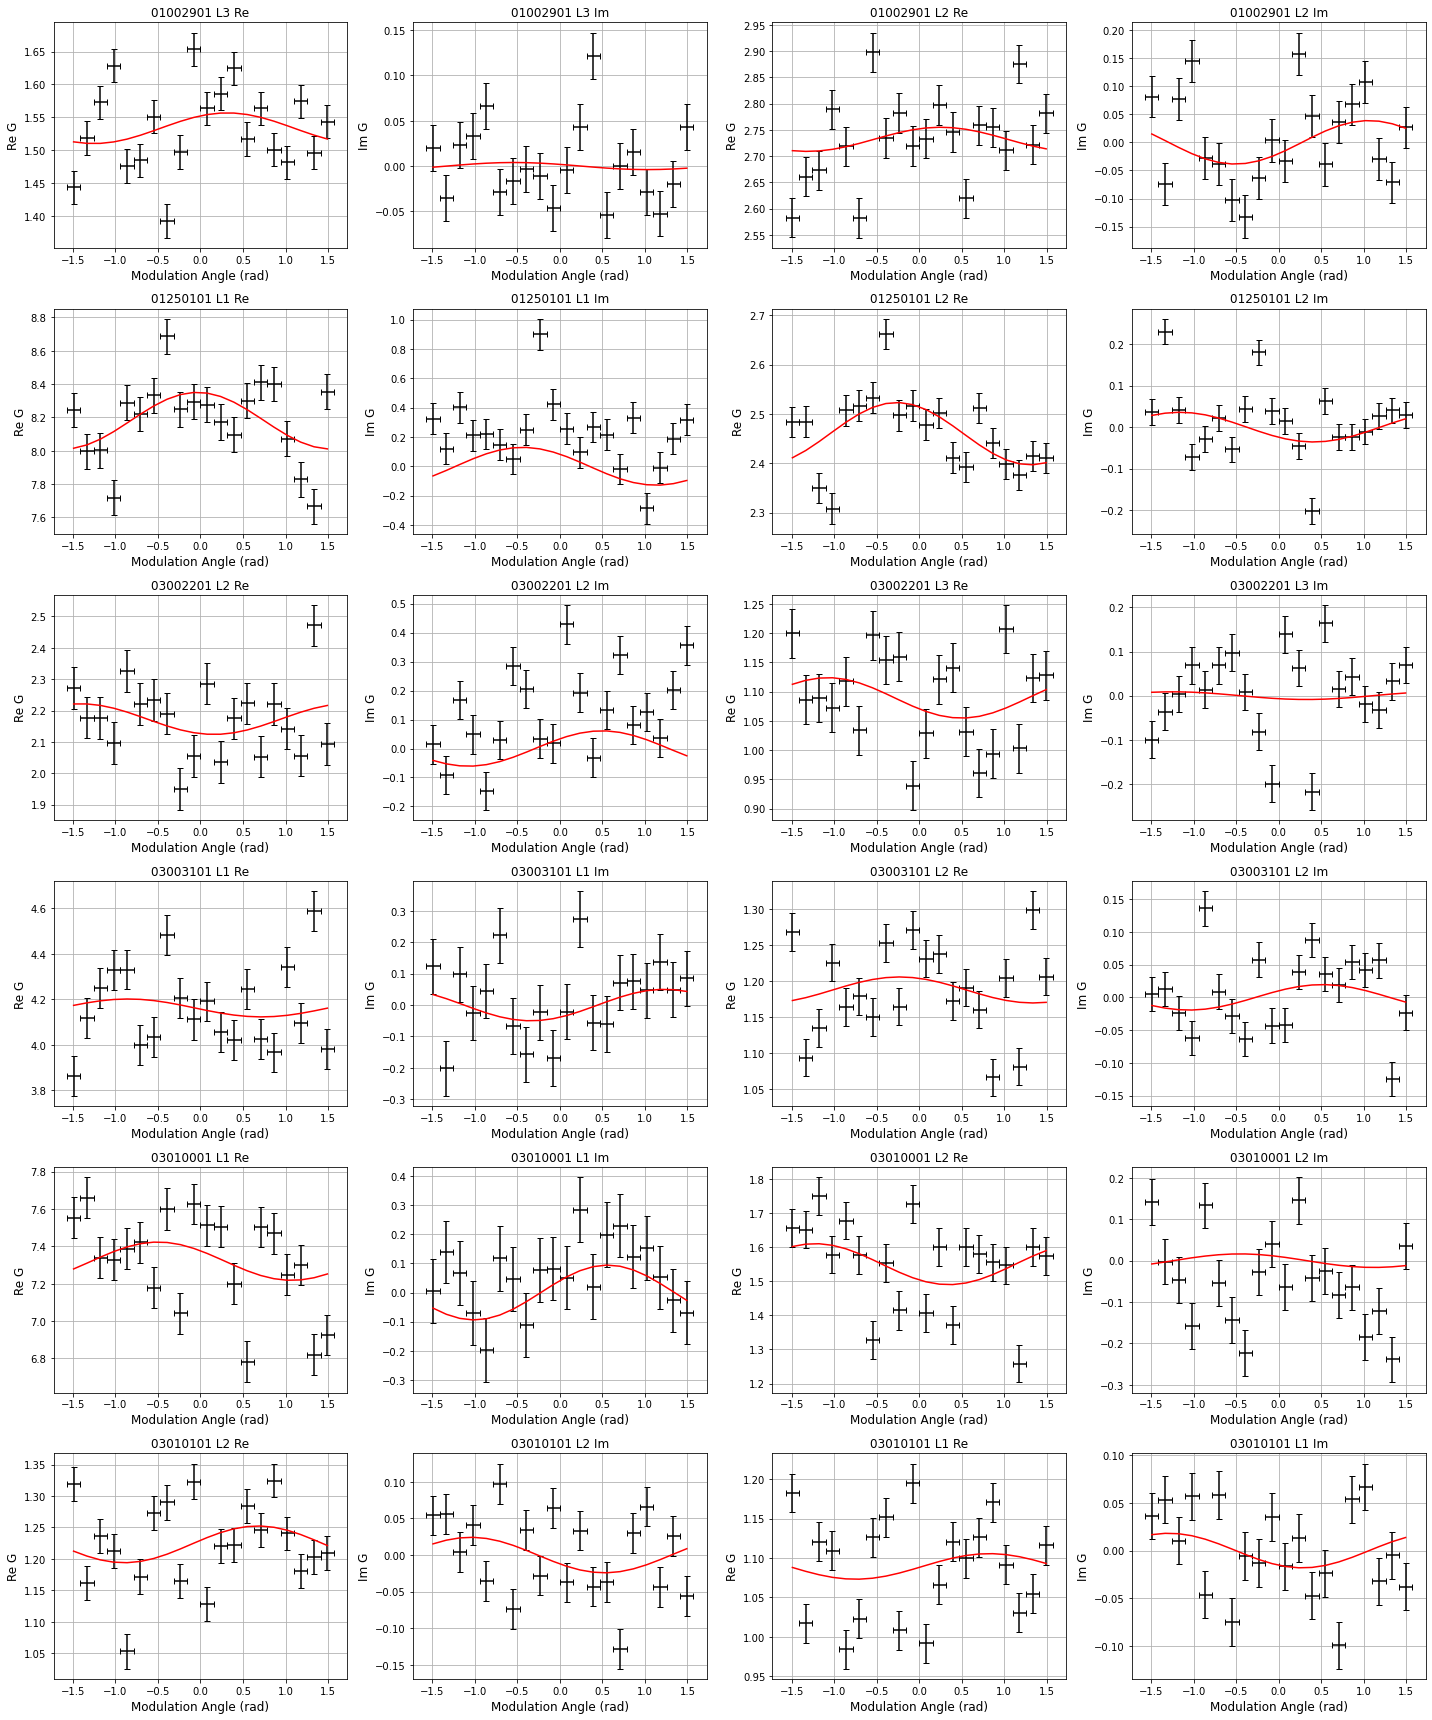

In [7]:
import matplotlib.pyplot as plt

# Example xerr calculation (assumes uniform spacing)
example_obs = list(data_dict.keys())[0]
example_L = list(data_dict[example_obs].keys())[0]
xerr = (data_dict[example_obs][example_L]['av_mod'][1] - data_dict[example_obs][example_L]['av_mod'][0]) / 2

# Determine max number of Ls per obs
max_Ls = max(len(data_dict[obs]) for obs in obs_names)

# Create subplots: rows = number of obs, cols = 2 * max_Ls (Re & Im for each L)
fig, axs = plt.subplots(len(obs_names), 2 * max_Ls, figsize=(5 * 2 * max_Ls, 4 * len(obs_names)))

# Ensure axs is 2D
if len(obs_names) == 1:
    axs = axs.reshape(1, -1)
elif max_Ls == 1:
    axs = axs.reshape(len(obs_names), -1)

for row_idx, obs in enumerate(obs_names):
    L_keys = list(data_dict[obs].keys())
    for col_idx, L_key in enumerate(L_keys):
        # Left panel: Real part
        ax_real = axs[row_idx, 2 * col_idx]
        ax_real.errorbar(
            data_dict[obs][L_key]['av_mod'],
            data_dict[obs][L_key]['G_real'],
            xerr=xerr,
            yerr=data_dict[obs][L_key]['dG'],
            ls='None',
            color='black',
            capsize=3
        )
        ax_real.plot(
            data_dict[obs][L_key]['av_mod'],
            data_dict[obs][L_key]['fit_model_real'],
            'r-'
        )
        ax_real.set_title(f'{obs} {L_key} Re')
        ax_real.set_xlabel('Modulation Angle (rad)', fontsize=12)
        ax_real.set_ylabel('Re G', fontsize=12)
        ax_real.grid()

        # Right panel: Imag part
        ax_imag = axs[row_idx, 2 * col_idx + 1]
        ax_imag.errorbar(
            data_dict[obs][L_key]['av_mod'],
            data_dict[obs][L_key]['G_imag'],
            xerr=xerr,
            yerr=data_dict[obs][L_key]['dG'],
            ls='None',
            color='black',
            capsize=3
        )
        ax_imag.plot(
            data_dict[obs][L_key]['av_mod'],
            data_dict[obs][L_key]['fit_model_imag'],
            'r-'
        )
        ax_imag.set_title(f'{obs} {L_key} Im')
        ax_imag.set_xlabel('Modulation Angle (rad)', fontsize=12)
        ax_imag.set_ylabel('Im G', fontsize=12)
        ax_imag.grid()

plt.tight_layout()
plt.savefig('all_obs_qpo_search.png', dpi=1000)
plt.show()
